## Data Source Path

https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset/data


In [ ]:
import os
import gdown
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [ ]:
!gdown https://docs.google.com/uc?id=16VR3uvQBxRt5avaEHJyqmw0_Qo76yM8h

Downloading...
From: https://docs.google.com/uc?id=16VR3uvQBxRt5avaEHJyqmw0_Qo76yM8h
To: /content/Online Retail.xlsx
100% 23.7M/23.7M [00:00<00:00, 172MB/s]


In [ ]:
customer_df = pd.read_excel('Online Retail.xlsx')
print(customer_df.shape)
customer_df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
customer_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning

- Checking duplication in the dataset & handling them.
- Checking & Handling missing values.
- Checking data inconsitencies and handling them

## Checking Data Duplicates

In [ ]:
customer_df[customer_df.duplicated()].shape

(5268, 8)

## Dropping Duplicate items in the dataset

In [ ]:
clean_customer_df = customer_df[~customer_df.duplicated()]
clean_customer_df.shape

(536641, 8)

## Checking Null Values

In [ ]:
clean_customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

## Handling Missing values by dropping rows with null values in CustomerID

In [ ]:
clean_customer_df = clean_customer_df.loc[customer_df['CustomerID'].notnull()]
print(clean_customer_df.shape)

(401604, 8)


In [ ]:
clean_customer_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Text Cleaning

In [ ]:
clean_customer_df["Description"] = clean_customer_df["Description"].str.strip()
clean_customer_df["Description"] = clean_customer_df["Description"].str.lower()

In [ ]:
clean_customer_df["Description"].value_counts()

white hanging heart t-light holder    2058
regency cakestand 3 tier              1894
jumbo bag red retrospot               1659
party bunting                         1409
assorted colour bird ornament         1405
                                      ... 
ocean stripe hammock                     1
tiny crystal bracelet green              1
purple glass tassle bag charm            1
ladle love heart red                     1
blue/nat shell necklace w pendant        1
Name: Description, Length: 3885, dtype: int64

## Deriving a new feature called 'Purchased_amount' by using UnitPrice and Quantity Feature

In [ ]:
clean_customer_df['Purchased_amount'] = clean_customer_df['UnitPrice'] * clean_customer_df["Quantity"]

In [ ]:
clean_customer_df['Quantity'].describe()

count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
clean_customer_df['UnitPrice'].describe()

count    401604.000000
mean          3.474064
std          69.764035
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
clean_customer_df.loc[clean_customer_df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchased_amount
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,zinc t-light holder stars small,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,victorian sewing box large,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,hanging heart jar t-light holder,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [ ]:
clean_customer_df['is_returned'] = 0
clean_customer_df.loc[clean_customer_df['Purchased_amount'] < 0, 'is_returned'] = 1

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [ ]:
def get_embeddings(sentences):
  return model.encode(sentences, batch_size=32, show_progress_bar=True)

In [ ]:
clean_customer_df['StockCode'] = clean_customer_df['StockCode'].astype('str')
clean_customer_df['UnitPrice'] = clean_customer_df['UnitPrice'].astype('str')

In [ ]:
clean_customer_df['Product_Description'] = "the stockcode is " + clean_customer_df["StockCode"] + ", whose unit price is " + clean_customer_df['UnitPrice'] + "." + clean_customer_df['Description']
clean_customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchased_amount,is_returned,Product_Description
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0,"the stockcode is 85123A, whose unit price is 2..."
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,"the stockcode is 71053, whose unit price is 3...."
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0,"the stockcode is 84406B, whose unit price is 2..."
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,"the stockcode is 84029G, whose unit price is 3..."
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0,"the stockcode is 84029E, whose unit price is 3..."


In [ ]:
clean_customer_df['Product_Description'].value_counts()

the stockcode is 85123A, whose unit price is 2.95.white hanging heart t-light holder    1667
the stockcode is 22423, whose unit price is 12.75.regency cakestand 3 tier              1495
the stockcode is 84879, whose unit price is 1.69.assorted colour bird ornament          1351
the stockcode is 20725, whose unit price is 1.65.lunch bag red retrospot                1259
the stockcode is 47566, whose unit price is 4.95.party bunting                          1213
                                                                                        ... 
the stockcode is D, whose unit price is 9.87.discount                                      1
the stockcode is 37343, whose unit price is 0.39.polkadot mug pink                         1
the stockcode is 22744, whose unit price is 5.79.make your own monsoon card kit            1
the stockcode is 20735, whose unit price is 0.72.black mini tape measure                   1
the stockcode is 20936, whose unit price is 1.25.forked cactus candle 

In [ ]:
product_df = clean_customer_df['Product_Description'].value_counts().to_frame().reset_index()
product_df.columns = ['Product_Description', 'Frequency']
product_df.head()

,Product_Description,Frequency
0,"the stockcode is 85123A, whose unit price is 2...",1667
1,"the stockcode is 22423, whose unit price is 12...",1495
2,"the stockcode is 84879, whose unit price is 1....",1351
3,"the stockcode is 20725, whose unit price is 1....",1259
4,"the stockcode is 47566, whose unit price is 4....",1213


In [ ]:
embeddings = get_embeddings(product_df['Product_Description'])
embeddings.shape

Batches:   0%|          | 0/288 [00:00<?, ?it/s]

(9200, 384)

In [ ]:
# Convert NumPy array of embedding into data frame
embeddings_df = pd.DataFrame(embeddings)
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.007757,0.059118,-0.044739,0.031692,-0.104933,-0.006269,0.015667,0.059637,0.082378,-0.029600,...,-0.052913,-0.075762,0.016695,-0.012379,-0.049243,-0.025224,0.052173,-0.027854,-0.067040,0.046246
1,-0.006644,-0.000591,-0.095815,-0.025152,-0.099959,0.040197,-0.037526,-0.017059,0.042848,-0.035999,...,-0.025715,-0.048370,-0.053462,0.000290,-0.007562,0.029542,0.006833,-0.117637,-0.090333,-0.020532
2,0.008673,-0.008257,-0.063662,0.014021,-0.050000,0.013723,0.046567,-0.031032,0.064031,-0.055180,...,-0.040238,-0.062680,-0.092518,-0.039773,0.010005,-0.020009,-0.012595,-0.088087,-0.055872,0.008257
3,-0.041747,-0.016856,-0.078083,0.041954,-0.060382,0.018715,0.030910,-0.010344,0.005586,-0.074854,...,-0.004527,-0.002413,-0.086690,-0.077515,-0.013899,0.034745,-0.008271,-0.049280,-0.142207,0.017307
4,0.047230,-0.026713,-0.009174,-0.009612,-0.078782,0.055283,0.016870,0.006592,-0.005412,0.040146,...,0.006074,0.004475,-0.043981,-0.041588,0.006237,-0.050626,-0.050459,-0.088617,-0.062889,0.003674


In [ ]:
embeddings_df['Product_Description'] = product_df['Product_Description']
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,Product_Description
0,0.007757,0.059118,-0.044739,0.031692,-0.104933,-0.006269,0.015667,0.059637,0.082378,-0.029600,...,-0.075762,0.016695,-0.012379,-0.049243,-0.025224,0.052173,-0.027854,-0.067040,0.046246,"the stockcode is 85123A, whose unit price is 2..."
1,-0.006644,-0.000591,-0.095815,-0.025152,-0.099959,0.040197,-0.037526,-0.017059,0.042848,-0.035999,...,-0.048370,-0.053462,0.000290,-0.007562,0.029542,0.006833,-0.117637,-0.090333,-0.020532,"the stockcode is 22423, whose unit price is 12..."
2,0.008673,-0.008257,-0.063662,0.014021,-0.050000,0.013723,0.046567,-0.031032,0.064031,-0.055180,...,-0.062680,-0.092518,-0.039773,0.010005,-0.020009,-0.012595,-0.088087,-0.055872,0.008257,"the stockcode is 84879, whose unit price is 1...."
3,-0.041747,-0.016856,-0.078083,0.041954,-0.060382,0.018715,0.030910,-0.010344,0.005586,-0.074854,...,-0.002413,-0.086690,-0.077515,-0.013899,0.034745,-0.008271,-0.049280,-0.142207,0.017307,"the stockcode is 20725, whose unit price is 1...."
4,0.047230,-0.026713,-0.009174,-0.009612,-0.078782,0.055283,0.016870,0.006592,-0.005412,0.040146,...,0.004475,-0.043981,-0.041588,0.006237,-0.050626,-0.050459,-0.088617,-0.062889,0.003674,"the stockcode is 47566, whose unit price is 4...."


In [ ]:
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
X = embeddings_df.iloc[:, :-1].values
X.shape

(9200, 384)

In [ ]:
from sklearn.metrics import silhouette_score

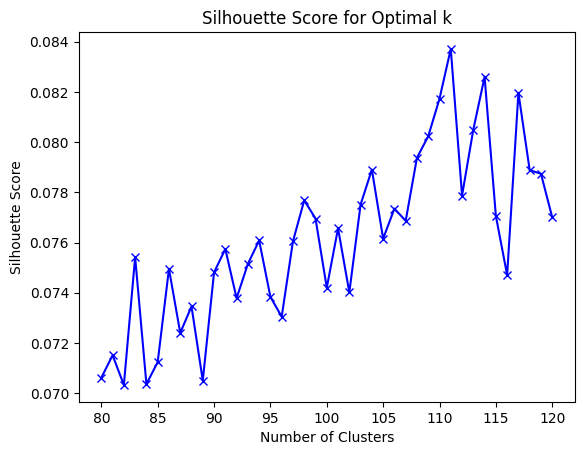

In [ ]:
silhouette_scores = {}
K = range(80, 121)  # You can adjust the range as needed

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    silhouette_scores[k] = silhouette_score(X, kmeans.labels_)

plt.plot(K, silhouette_scores.values(), 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

## Since Shiloute Score is maximum at k = 110, use 110 clusters

In [ ]:
kmeans = KMeans(n_clusters=110)
kmeans.fit(X)

KMeans(n_clusters=110)

In [ ]:
cluster_labels = ['cluster_' + str(label) for label in kmeans.labels_]
print(cluster_labels)
print(len(cluster_labels))

['cluster_5', 'cluster_68', 'cluster_76', 'cluster_2', 'cluster_60', 'cluster_68', 'cluster_22', 'cluster_2', 'cluster_60', 'cluster_2', 'cluster_80', 'cluster_2', 'cluster_36', 'cluster_2', 'cluster_2', 'cluster_22', 'cluster_101', 'cluster_100', 'cluster_1', 'cluster_70', 'cluster_13', 'cluster_13', 'cluster_13', 'cluster_2', 'cluster_13', 'cluster_101', 'cluster_15', 'cluster_100', 'cluster_3', 'cluster_50', 'cluster_26', 'cluster_24', 'cluster_25', 'cluster_93', 'cluster_22', 'cluster_2', 'cluster_29', 'cluster_95', 'cluster_22', 'cluster_68', 'cluster_19', 'cluster_2', 'cluster_70', 'cluster_88', 'cluster_93', 'cluster_68', 'cluster_45', 'cluster_13', 'cluster_80', 'cluster_19', 'cluster_19', 'cluster_5', 'cluster_101', 'cluster_1', 'cluster_15', 'cluster_22', 'cluster_22', 'cluster_2', 'cluster_16', 'cluster_9', 'cluster_79', 'cluster_16', 'cluster_18', 'cluster_35', 'cluster_79', 'cluster_100', 'cluster_13', 'cluster_84', 'cluster_12', 'cluster_22', 'cluster_87', 'cluster_22', '

In [ ]:
embeddings_df['cluster_labels'] = cluster_labels

## Merging the cluster information with customer dataframe

In [ ]:
final_customer_df = pd.merge(clean_customer_df, embeddings_df[['Product_Description', 'cluster_labels']],
                             how="inner", on = "Product_Description")
final_customer_df.shape

(401604, 12)

In [ ]:
final_customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchased_amount,is_returned,Product_Description,cluster_labels
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,0,"the stockcode is 85123A, whose unit price is 2...",cluster_5
1,536373,85123A,white hanging heart t-light holder,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.3,0,"the stockcode is 85123A, whose unit price is 2...",cluster_5
2,536375,85123A,white hanging heart t-light holder,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.3,0,"the stockcode is 85123A, whose unit price is 2...",cluster_5
3,536390,85123A,white hanging heart t-light holder,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,163.2,0,"the stockcode is 85123A, whose unit price is 2...",cluster_5
4,536394,85123A,white hanging heart t-light holder,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,81.6,0,"the stockcode is 85123A, whose unit price is 2...",cluster_5


## Convert datetime features

In [ ]:
final_customer_df['year'] = final_customer_df['InvoiceDate'].dt.year
final_customer_df['month'] = final_customer_df['InvoiceDate'].dt.month
final_customer_df['day'] = final_customer_df['InvoiceDate'].dt.day


In [ ]:
final_customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchased_amount,is_returned,Product_Description,cluster_labels,year,month,day
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,0,"the stockcode is 85123A, whose unit price is 2...",cluster_5,2010,12,1
1,536373,85123A,white hanging heart t-light holder,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.3,0,"the stockcode is 85123A, whose unit price is 2...",cluster_5,2010,12,1
2,536375,85123A,white hanging heart t-light holder,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.3,0,"the stockcode is 85123A, whose unit price is 2...",cluster_5,2010,12,1
3,536390,85123A,white hanging heart t-light holder,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,163.2,0,"the stockcode is 85123A, whose unit price is 2...",cluster_5,2010,12,1
4,536394,85123A,white hanging heart t-light holder,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,81.6,0,"the stockcode is 85123A, whose unit price is 2...",cluster_5,2010,12,1


# Define a mapping from country to region


In [ ]:
country_to_region = {
    'United Kingdom': 'United Kingdom',
    'Cyprus': 'MiddleEast',
    'Netherlands': 'Europe',
    'EIRE': 'Europe',
    'Switzerland': 'Europe',
    'Singapore': 'Asia',
    'France': 'Europe',
    'Denmark': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'Belgium': 'Europe',
    'Spain': 'Europe',
    'Austria': 'Europe',
    'Portugal': 'Europe',
    'Channel Islands': 'Europe',
    'Canada': 'NorthAmerica',
    'Unspecified': 'Unspecified',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Japan': 'Asia',
    'Sweden': 'Europe',
    'Australia': 'Australia',
    'Iceland': 'Europe',
    'Finland': 'Europe',
    'Lebanon': 'MiddleEast',
    'Israel': 'MiddleEast',
    'European Community': 'Europe',
    'Malta': 'Europe',
    'RSA': 'Africa',
    'Greece': 'Europe',
    'Czech Republic': 'Europe',
    'USA': 'NorthAmerica',
    'Brazil': 'SouthAmerica',
    'United Arab Emirates': 'MiddleEast',
    'Lithuania': 'Europe',
    'Saudi Arabia': 'MiddleEast',
    'Bahrain': 'MiddleEast'
}

In [ ]:
final_customer_df['Country'] = final_customer_df['Country'].map(country_to_region)

In [ ]:
final_customer_df['Country'].value_counts()

United Kingdom    356728
Europe             41260
Australia           1258
MiddleEast           998
Asia                 587
NorthAmerica         442
Unspecified          241
Africa                58
SouthAmerica          32
Name: Country, dtype: int64

In [ ]:
# Define custom aggregation functions
aggfuncs = {
    'Purchased_amount': 'sum',
    'Quantity': 'sum',
}


In [ ]:
pivot_df = pd.pivot_table(data = final_customer_df, index=["CustomerID", "year", "month"],
                          columns = "cluster_labels", values=["Purchased_amount", "Quantity"],
                          aggfunc= aggfuncs)
pivot_df.columns = [col2 +  "_" + col1 for col1, col2 in pivot_df.columns]
pivot_df.reset_index(inplace=True)
pivot_df.fillna(0, inplace = True)
pivot_df.head()

,CustomerID,year,month,cluster_0_Purchased_amount,cluster_1_Purchased_amount,cluster_10_Purchased_amount,cluster_100_Purchased_amount,cluster_101_Purchased_amount,cluster_102_Purchased_amount,cluster_103_Purchased_amount,...,cluster_90_Quantity,cluster_91_Quantity,cluster_92_Quantity,cluster_93_Quantity,cluster_94_Quantity,cluster_95_Quantity,cluster_96_Quantity,cluster_97_Quantity,cluster_98_Quantity,cluster_99_Quantity
0,12346.0,2011,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12347.0,2010,12,0.0,0.0,0.0,0.0,75.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24.0,0.0,4.0,12.0,0.0
2,12347.0,2011,1,0.0,0.0,0.0,0.0,75.0,0.0,7.8,...,0.0,0.0,0.0,0.0,0.0,12.0,0.0,18.0,0.0,0.0
3,12347.0,2011,4,0.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,12.0,0.0,16.0,0.0,0.0
4,12347.0,2011,6,0.0,0.0,0.0,0.0,45.0,0.0,10.2,...,0.0,0.0,0.0,46.0,0.0,18.0,0.0,12.0,0.0,0.0


In [ ]:
country_mapping_df = final_customer_df.groupby(["CustomerID", "year", "month"],
                                               as_index=False)['Country'].first()

# Perform one-hot encoding
country_mapping_df = pd.get_dummies(country_mapping_df, columns=["Country"], prefix="Country")
country_mapping_df.head()


,CustomerID,year,month,Country_Africa,Country_Asia,Country_Australia,Country_Europe,Country_MiddleEast,Country_NorthAmerica,Country_SouthAmerica,Country_United Kingdom,Country_Unspecified
0,12346.0,2011,1,0,0,0,0,0,0,0,1,0
1,12347.0,2010,12,0,0,0,1,0,0,0,0,0
2,12347.0,2011,1,0,0,0,1,0,0,0,0,0
3,12347.0,2011,4,0,0,0,1,0,0,0,0,0
4,12347.0,2011,6,0,0,0,1,0,0,0,0,0


## Dropping Country_Unspecified feature to get rid of dummy variable traps

In [ ]:
country_mapping_df.drop('Country_Unspecified', axis=1, inplace=True)
country_mapping_df.shape

(13675, 11)

## Merging pivot_df and country_mapping_df

In [ ]:
final_customer = pd.merge(pivot_df, country_mapping_df,
                          on = ["CustomerID", "year", "month"],
                          how = "inner")

In [ ]:
final_customer.head()

,CustomerID,year,month,cluster_0_Purchased_amount,cluster_1_Purchased_amount,cluster_10_Purchased_amount,cluster_100_Purchased_amount,cluster_101_Purchased_amount,cluster_102_Purchased_amount,cluster_103_Purchased_amount,...,cluster_98_Quantity,cluster_99_Quantity,Country_Africa,Country_Asia,Country_Australia,Country_Europe,Country_MiddleEast,Country_NorthAmerica,Country_SouthAmerica,Country_United Kingdom
0,12346.0,2011,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,1
1,12347.0,2010,12,0.0,0.0,0.0,0.0,75.0,0.0,0.0,...,12.0,0.0,0,0,0,1,0,0,0,0
2,12347.0,2011,1,0.0,0.0,0.0,0.0,75.0,0.0,7.8,...,0.0,0.0,0,0,0,1,0,0,0,0
3,12347.0,2011,4,0.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0
4,12347.0,2011,6,0.0,0.0,0.0,0.0,45.0,0.0,10.2,...,0.0,0.0,0,0,0,1,0,0,0,0


## Customer Segmentation

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
data = final_customer.iloc[:, 1:].values
data.shape

(13675, 230)

In [ ]:
from sklearn.metrics import silhouette_score

100%|██████████| 19/19 [03:41<00:00, 11.66s/it]


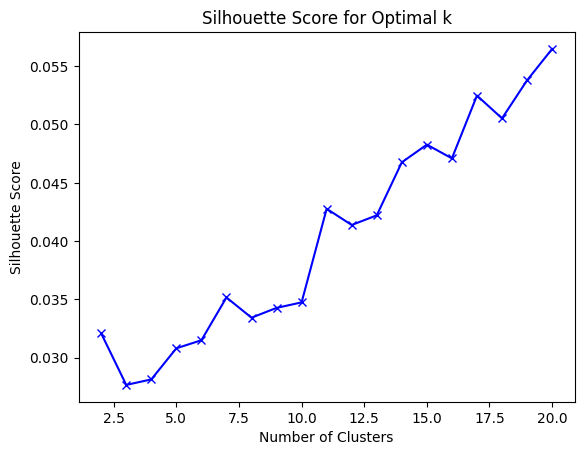

In [ ]:
silhouette_scores = {}
K = range(2,21)  # You can adjust the range as needed

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    silhouette_scores[k] = silhouette_score(X, kmeans.labels_)

plt.plot(K, silhouette_scores.values(), 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

## Fitting KMEANS

In [ ]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(data)

KMeans(n_clusters=30)

In [ ]:
len(kmeans.labels_)

13675

In [ ]:
final_labels = ['label_' + str(label) for label in kmeans.labels_]
print(final_labels)
print(len(final_labels))

['label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_8', 'label_0', 'label_0', 'label_8', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_8', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0', 'label_0'

In [ ]:
final_customer['final_label'] = final_labels

## Visualization Using Tensorboard Embedding Projector

In [ ]:
final_customer.to_csv('customer_cluster_embeddings.csv', index=False)

In [ ]:
import tensorflow as tf
from tensorboard.plugins import projector

In [ ]:
# Set up a logs directory, so Tensorboard knows where to look for files.
log_dir='./customer_segmentation/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
# Save Labels separately on a line-by-line manner.
print(final_customer.shape)
final_customer['final_label'].to_csv("./customer_segmentation/meta_data.tsv",
                                 index=False, sep='\t', header=False)
features= tf.Variable(final_customer.drop('final_label', axis=1))
weights = tf.Variable(features)
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))#feature
# Set up config.
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.metadata_path = 'meta_data.tsv'#label
projector.visualize_embeddings(log_dir, config)



(13675, 232)


In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir=customer_segmentation/

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-10-15 12:06:14.020176: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.